In [4]:
#import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import random


In [5]:
df = pd.read_excel('Year7Data - 2023.xlsx', sheet_name='Sheet1') # reads "year7Data - 2023.xlsx" from "sheet1" and stores the data in the 'df' dataframe

print(df)

     CT1  CT2  Port  Total I Grade
0     95   92    88     92       A
1     53   68    38     56       C
2     63   54    62     59       C
3     91   57    74     74       B
4     98   86    92     92       A
..   ...  ...   ...    ...     ...
218   81   76    71     77       B
219   49   68    74     61       C
220   40   35    58     41       D
221   81   76    85     80       A
222   53   38    44     45       D

[223 rows x 5 columns]


In [6]:
classes = []

#extracting the data "I grade", "CT1", "CT12", "total" from the data frame
grades = df.loc[:,"I Grade"]
x1 = df.loc[:,"CT1"]
x2 = df.loc[:,"CT2"]
y = df.loc[:,"Total"]

for n in range(0,len(y)):

  grade = grades[n]
  if grade == "A":
     classes.append(0)# assigns the colour purple (class 0) for the grade "A"

  elif grade == "B":
    classes.append(1)#dark blue

  elif grade == "C":
    classes.append(2)#aquamarine

  elif grade == "D":
    classes.append(3)#green

  else:
    classes.append(4)#yellow


slope, intercept, r, p, std_err = stats.linregress(x1, y) #calculates the linear regression parameters between "x1", and "y"


def myfunc(x): #defines the linear regression function
  return slope * x + intercept

data = list(zip(x1, y, classes)) #Creates a list of data points to combine "x1", and "y"

mymodel = list(map(myfunc, x1)) #applies the linear regression function to all values of "x1"


In [7]:
new_x = random.randint(min(x1), max(x2)) #generates random value in the range of given data for the variable "new_x"
print(new_x)
new_y = myfunc(new_x) #calculates the corresponding "y" value
roundY = round(new_y) #rounds to nearest integer


38


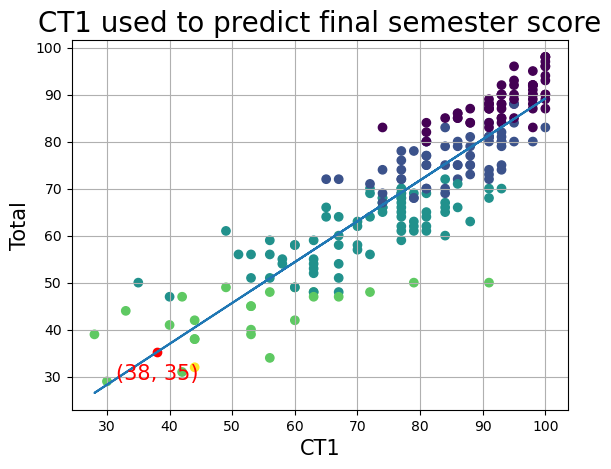

In [8]:
plt.scatter(x1, y, c=classes)# scatter plot the data with colour coded grades
plt.scatter(new_x, new_y, c='red') 
plt.annotate(f'({new_x}, {roundY})', (new_x, new_y), textcoords="offset points", xytext=(0,-20), ha='center', c='red', fontsize=15) #annotate data with coordinates
plt.plot(x1, mymodel) #plots the new models prediction
plt.xlabel('CT1', fontsize=15) #adds font
plt.ylabel('Total', fontsize=15) #adds font
plt.title('CT1 used to predict final semester score', fontsize=20) #adds title
plt.grid() #adds grid
plt.savefig('main2.png') # saves the plot to the png file
plt.show()